<Axes: title={'center': 'correlation analysis'}>

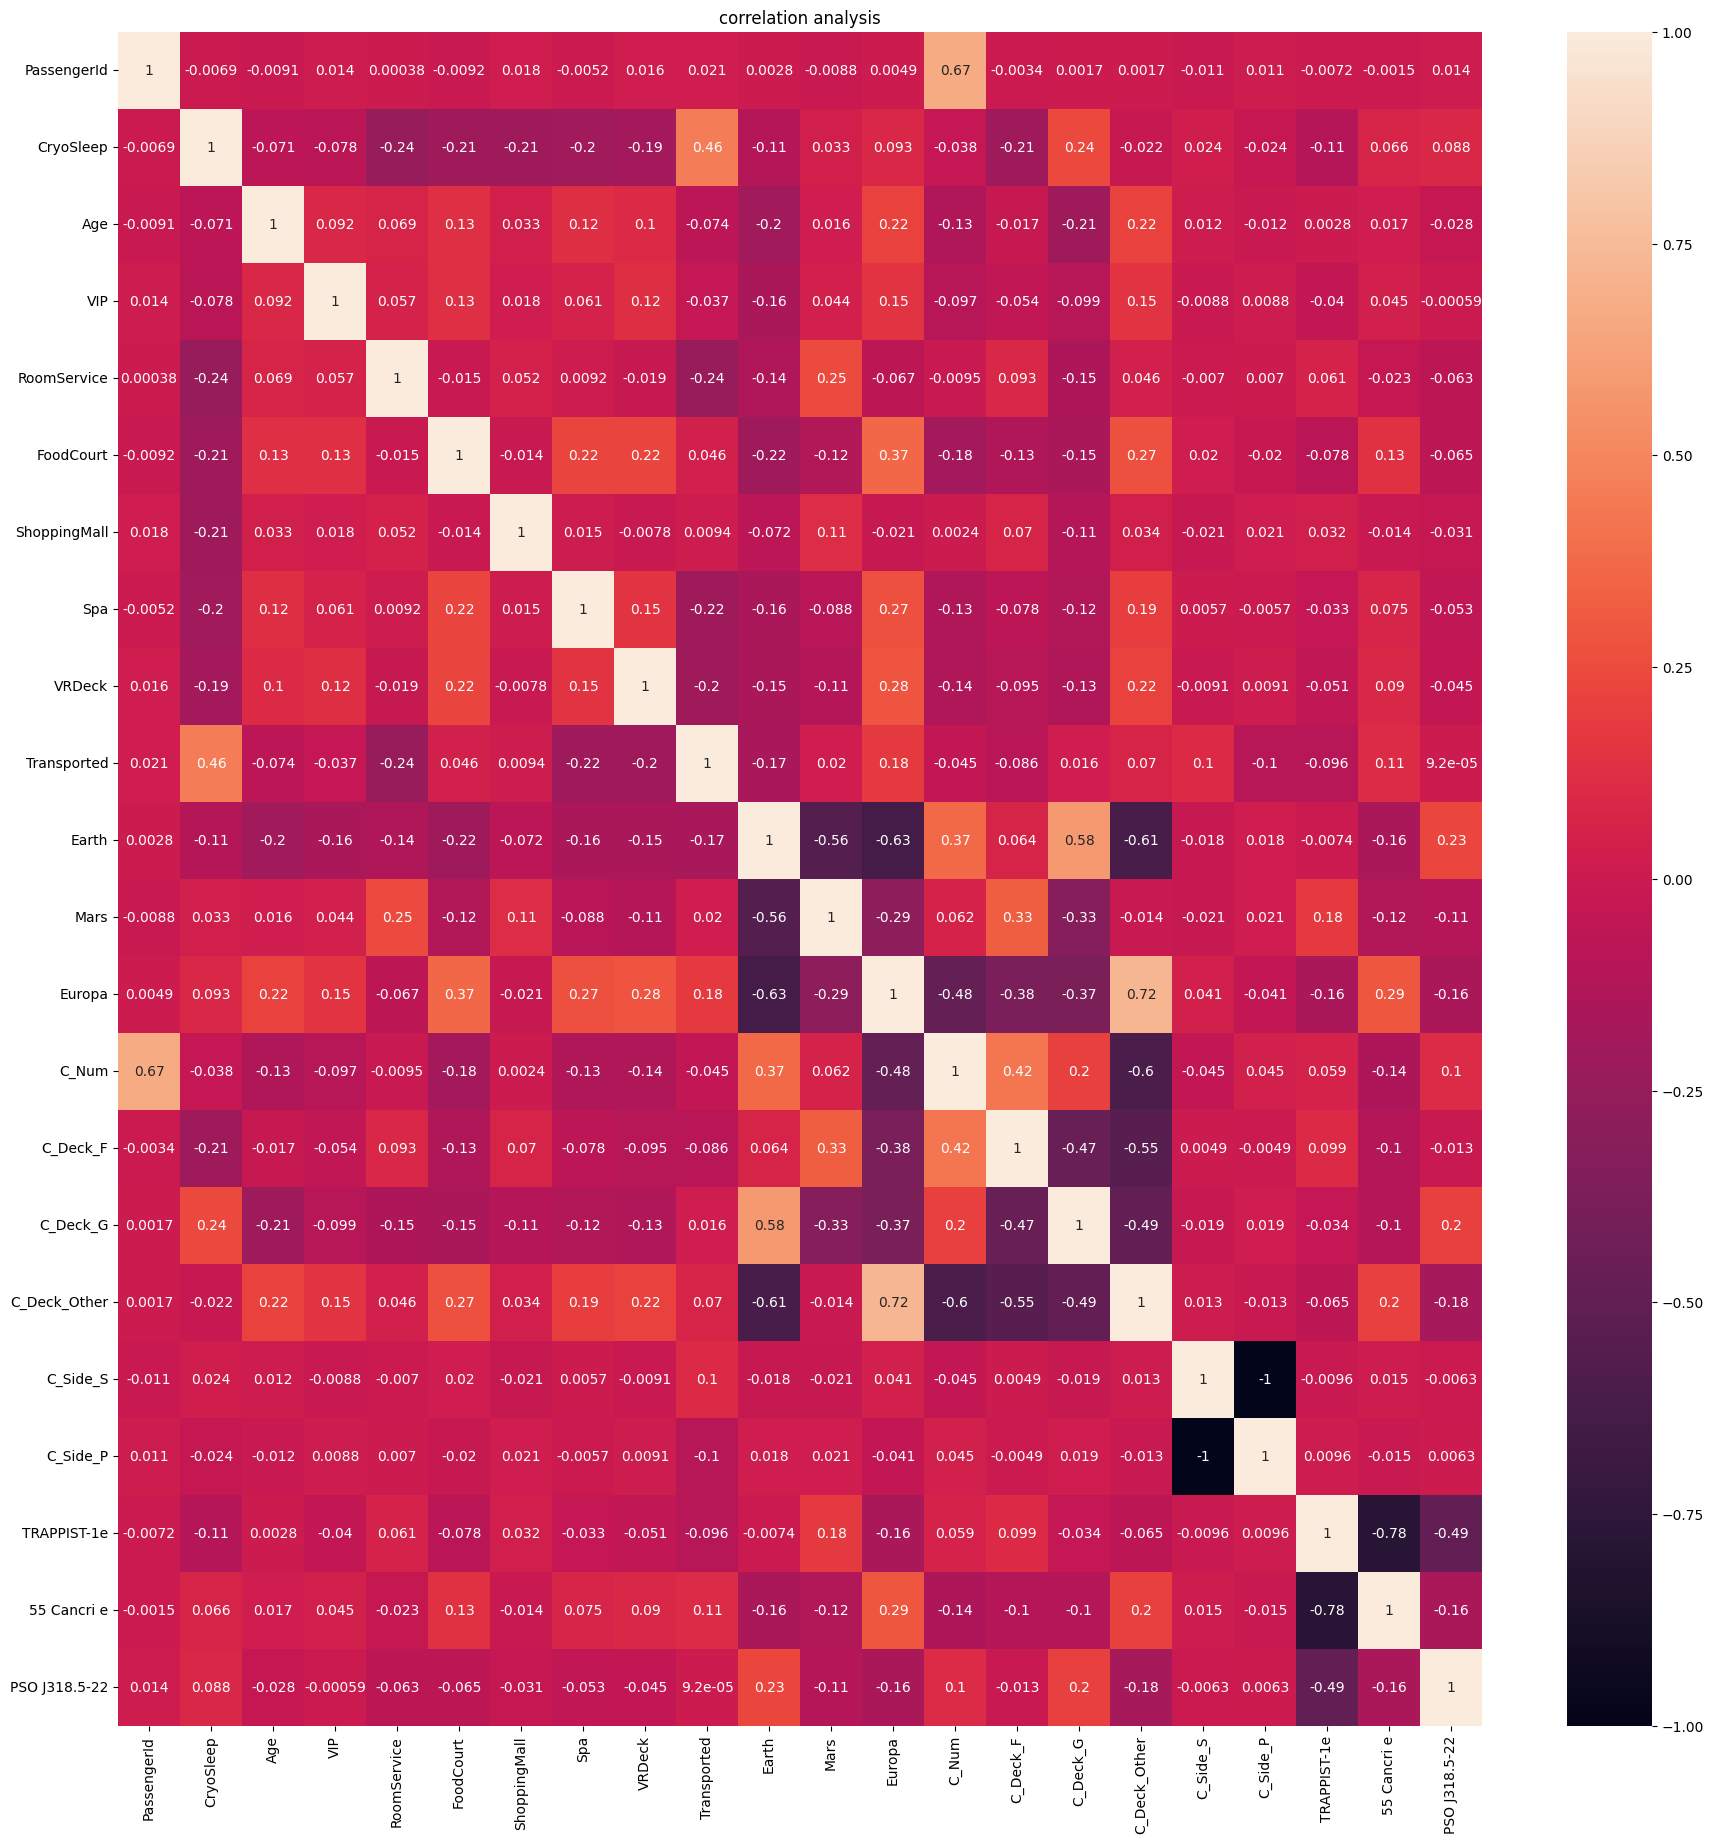

In [13]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy 
import numpy as np
#import sklearn 


#load data 
stitanic_test_file_path = 'test.csv'
stitanic_train_file_path = 'train.csv'

stitanic_data = pd.read_csv(stitanic_train_file_path)


#clean and explore data


# Home planet
#class str
#check gt lớn nhất 
#print(stitanic_data['HomePlanet'].value_counts()) : Earth là nhiều nhất 
#fill
#create new col
#drop oldcol

stitanic_data['HomePlanet'] = stitanic_data['HomePlanet'].fillna("Earth")
#tạo col Earth
stitanic_data['Earth'] = stitanic_data['HomePlanet']
stitanic_data['Earth'] = stitanic_data['Earth'].replace(['Earth','Mars','Europa'] , [ 1, 0 , 0] ) 
#tạo col Mars 
stitanic_data['Mars'] = stitanic_data['HomePlanet']
stitanic_data['Mars'] = stitanic_data['Mars'].replace(['Earth','Mars','Europa'] , [ 0, 1 , 0] )
#tạo col Europa 
stitanic_data['Europa'] = stitanic_data['HomePlanet']
stitanic_data['Europa'] = stitanic_data['Europa'].replace(['Earth','Mars','Europa'] , [ 0, 0 , 1] )
#drop oldcol
del stitanic_data["HomePlanet"]



#cryosleep
#class bool 
#check the quantity of 0 and 1
#stitanic_data['CryoSleep'].value_counts()
# number of zero >number of 1
#replace  nan = 0 
stitanic_data['CryoSleep'] = stitanic_data['CryoSleep'].fillna(0)
stitanic_data['CryoSleep'] = stitanic_data['CryoSleep'].replace([False,True],[ 0 , 1 ])



#Cabin
# split cabin -> deck  , num , side

stitanic_data['C_Deck'] = stitanic_data['Cabin'].str[0] 
stitanic_data['C_Num'] = stitanic_data['Cabin'].str[2 : -2]
stitanic_data['C_Side'] = stitanic_data['Cabin'].str[-1]

#drop cabin
#del stitanic_data['Cabin'] 
#check gt lon nhat F G E B C D A T 
#print(stitanic_data['C_Deck'].value_counts())
#check gt lon nhat  S : 4288 P :4206
#print(stitanic_data['C_Side'].value_counts()) 

#fill num
stitanic_data['C_Deck'] = stitanic_data['C_Deck'].fillna("F")
stitanic_data['C_Num'] = stitanic_data['C_Num'].fillna(stitanic_data['C_Num'].median())
stitanic_data['C_Side'] = stitanic_data['C_Side'].fillna("S")
#new col deck_f
stitanic_data['C_Deck_F'] = stitanic_data['C_Deck']
stitanic_data['C_Deck_F'] = stitanic_data['C_Deck_F'].replace(['F','G','E','B','C','D','A','T'] , [1, 0 , 0 , 0 , 0 , 0 , 0 , 0])
#new col deck_g
stitanic_data['C_Deck_G'] = stitanic_data['C_Deck']
stitanic_data['C_Deck_G'] = stitanic_data['C_Deck_G'].replace(['F','G','E','B','C','D','A','T'] , [0, 1 , 0 , 0 , 0 , 0 , 0 , 0])
#new col deck_other 
stitanic_data['C_Deck_Other'] = stitanic_data['C_Deck']
stitanic_data['C_Deck_Other'] = stitanic_data['C_Deck_Other'].replace(['F','G','E','B','C','D','A','T'] , [0, 0 , 1 , 1 , 1 , 1 , 1 , 1])

#new col side S
stitanic_data['C_Side_S'] = stitanic_data['C_Side']
stitanic_data['C_Side_S'] = stitanic_data['C_Side_S'].replace(['S','P'] , [1 , 0])
#new col side P 
stitanic_data['C_Side_P'] = stitanic_data['C_Side']
stitanic_data['C_Side_P'] = stitanic_data['C_Side_P'].replace(['S','P'] , [0 , 1])

#drop col
del stitanic_data['Cabin']
del stitanic_data['C_Deck']
del stitanic_data['C_Side']



#Destination
#class str 
#check gt lon nhat 
#print(stitanic_data['Destination'].value_counts()) TRAPPIST-1e
#fill
#newcol
#drop oldcol

stitanic_data['Destination'] = stitanic_data['Destination'].fillna('TRAPPIST-1e')
#newcol Trap
stitanic_data['TRAPPIST-1e'] = stitanic_data['Destination'] 
stitanic_data['TRAPPIST-1e'] = stitanic_data['TRAPPIST-1e'].replace(['TRAPPIST-1e','55 Cancri e','PSO J318.5-22'] , [1,0 ,0])
#newcol Cancri 
stitanic_data['55 Cancri e'] = stitanic_data['Destination']
stitanic_data['55 Cancri e'] = stitanic_data['55 Cancri e'].replace(['TRAPPIST-1e','55 Cancri e','PSO J318.5-22'] , [0,1,0])
#newcol PSO 
stitanic_data['PSO J318.5-22'] = stitanic_data['Destination']
stitanic_data['PSO J318.5-22'] = stitanic_data['PSO J318.5-22'].replace(['TRAPPIST-1e','55 Cancri e','PSO J318.5-22'] , [0,0,1])
#drop oldcol
del stitanic_data["Destination"]


#Age
#class int
stitanic_data['Age'] = stitanic_data['Age'].fillna(stitanic_data['Age'].median())


#Vip
#class bool
#stitanic_data['VIP'].value_counts()
#print( stitanic_data['VIP'].value_counts())  false > true 
stitanic_data['VIP'] = stitanic_data['VIP'].fillna(0)
stitanic_data['VIP'] = stitanic_data['VIP'].replace([False,True],[ 0 , 1 ])


#RoomService 
#class int
stitanic_data['RoomService'] = stitanic_data['RoomService'].fillna(stitanic_data['RoomService'].median())


#FoodCourt
#class int
stitanic_data['FoodCourt'] = stitanic_data['FoodCourt'].fillna(stitanic_data['FoodCourt'].median())


#ShoppingMall
#class int
stitanic_data['ShoppingMall'] = stitanic_data['ShoppingMall'].fillna(stitanic_data['ShoppingMall'].median())


#Spa
#class int
stitanic_data['Spa'] = stitanic_data['Spa'].fillna(stitanic_data['Spa'].median())

#VRDeck

stitanic_data['VRDeck'] = stitanic_data['VRDeck'].fillna(stitanic_data['VRDeck'].median())


#Name
#drop
del stitanic_data["Name"]

#Transported
stitanic_data['Transported'] = stitanic_data['Transported'].replace([False,True],[ 0 , 1 ])


#xem data có make sense ko
#plot 3 variables

 
#correlation analysis
stitanic_cor = stitanic_data.corr(method='pearson')
#print(stitanic_cor)
#count = 0 
#stitanic_cor.columns :
#for coll in stitanic_cor.columns :
#    for row in stitanic_cor.columns : #range (len (stitanic_cor[coll]) ) :
#        if stitanic_cor[coll][row] >= 0.3 and stitanic_cor[coll][row] != 1:
#            count += 1
#            print ( coll , row , sep = ' ')
#            print ( " - " , str(stitanic_cor[coll][row]) , end = '\n')
    
#print (" count = " , str(count) )
#algorithm


#metric accuracy
#split data into train and test (8:2)
#logistic regression

#from sklearn.model_selection import train_test_split
#stitanic_data_base =  [ item for item in stitanic_data.columns if item != 'Transported' and item != 'PassengerId' ]
#X = stitanic_data[stitanic_data_base] 
#y = stitanic_data['Transported']
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 , random_state = 42)

#logistic regression

#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score

#model_logistic = LogisticRegression()
#model_logistic.fit(X_train, y_train)
#predict_train = model_logistic.predict(X_train)
#predict_test = model_logistic.predict(X_test) 
#train_log_pt = accuracy_score (predict_train , y_train )
#test_log_pt = accuracy_score (predict_test , y_test )
#print ( train_log_pt, test_log_pt , sep = '\n')




# 

#decision tree 



#print(stitanic_data['Transported'].head())
#print (stitanic_data.describe()) 
#missing_cnt = stitanic_data.isnull().sum()
#print(missing_cnt)

plt.figure(figsize=(len (stitanic_data.columns) ,len (stitanic_data.columns)))
plt.title( "correlation analysis")
sns.heatmap(data=stitanic_cor, annot=True)

           